TUGAS PENGGANTI UTS MATEMATIKA DISKRIT A


---

Nama : Izzati Kamila Putri

NPM : 24083010059

Artikel ilmiah yang saya analisis:

* **Judul:** Pengalaman Mencapai Flourishing pada Masa Quarter-Life Crisis
* **Penulis:** Taufik Akbar Rizqi Yunanto dan Defrian Ardella Afianto Putra
* **Asal Negara Corresponding Author:** Indonesia
* **DOI:** `https://doi.org/10.24198/jpsp.v7i3.49496`
* **Tahun:** 2023


#Preprocessing

In [1]:
!pip install Sastrawi

In [2]:
import pandas as pd
import string
import re
import textwrap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [3]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8,5)

##Teks asli

Untuk menganalisis artikel ini, saya melakukan tiga tahap pemrosesan teks yang menghasilkan tiga jenis teks berbeda untuk tujuan analisis yang spesifik.

Teks pertama adalah teks utuh dari artikel yang hanya dikutip bagian abstrak, pendahuluan, dan kesimpulannya. Teks ini digunakan untuk analisis yang memerlukan struktur kalimat dan paragraf yang lengkap, seperti menghitung jumlah kata per kalimat dan jumlah kalimat per paragraf.

In [4]:
with open("artikelmatdis_izzati.txt", "r", encoding="utf-8") as f:
    teks_asli = f.read()
print(textwrap.fill(teks_asli, width=100))

﻿Emerging adulthood adalah fase di mana individu berusia sekitar 20 tahun menghadapi tantangan, yang
apabila tidak diatasi dengan baik, dapat menyebabkan quarter-life crisis. Tantangan yang dihadapi
meliputi tuntutan hidup mandiri, menemukan pekerjaan, mengeksplorasi diri, pemaknaan diri yang
dalam, membangun relasi yang baik, dan berbagai tantangan lainnya. Hal tersebut berpengaruh terhadap
perubahan perilaku dalam proses memperoleh kesehatan mental tertinggi, yaitu flourishing. Tujuan
penelitian ini adalah untuk melihat lebih dalam mengenai pengalaman dan pemaknaan flourishing pada
masa quarter-life crisis. Partisipan penelitian adalah dua orang perempuan berusia 22 tahun yang
berada pada masa quarter-life crisis. Desain yang digunakan adalah kualitatif fenomenologis.
Penggalian data dilakukan dengan wawancara semiterstruktur. Teknik analisis data yang digunakan
adalah analisis data tematik. Hasil penelitian ini menemukan 12 tema, yaitu: bentuk masalah krisis,
faktor penyebab krisis,

##Teks yang sudah dibersihkan

Teks kedua yaitu teks bersih, yang dihasilkan setelah proses:
1. Pengubahan semua huruf menjadi huruf kecil (lowercase).
2. Penghapusan semua tanda baca, angka, dan karakter selain huruf.
3. Penghapusan spasi berlebih.

Teks ini digunakan untuk analisis yang hanya berfokus pada kata-kata tanpa terganggu oleh kapitalisasi atau tanda baca.

In [5]:
def bersihkan_teks(teks):
    teks = teks.lower()
    teks = re.sub(r'\([^)]*\)', '', teks)
    teks = re.sub(r'[^a-zA-Z\s]', ' ', teks)
    teks = re.sub(r'\s+', ' ', teks).strip()
    return teks

In [6]:
with open("artikelmatdis_izzati.txt", "r", encoding="utf-8") as file:
    teks = file.read()

teks_bersih = bersihkan_teks(teks)
print(textwrap.fill(teks_bersih, width=100))

emerging adulthood adalah fase di mana individu berusia sekitar tahun menghadapi tantangan yang
apabila tidak diatasi dengan baik dapat menyebabkan quarter life crisis tantangan yang dihadapi
meliputi tuntutan hidup mandiri menemukan pekerjaan mengeksplorasi diri pemaknaan diri yang dalam
membangun relasi yang baik dan berbagai tantangan lainnya hal tersebut berpengaruh terhadap
perubahan perilaku dalam proses memperoleh kesehatan mental tertinggi yaitu flourishing tujuan
penelitian ini adalah untuk melihat lebih dalam mengenai pengalaman dan pemaknaan flourishing pada
masa quarter life crisis partisipan penelitian adalah dua orang perempuan berusia tahun yang berada
pada masa quarter life crisis desain yang digunakan adalah kualitatif fenomenologis penggalian data
dilakukan dengan wawancara semiterstruktur teknik analisis data yang digunakan adalah analisis data
tematik hasil penelitian ini menemukan tema yaitu bentuk masalah krisis faktor penyebab krisis
dampak masalah terhadap diri 

##Teks yang sudah dihapus stopwords nya

Teks ketiga yaitu teks yang sudah dihapus stopwordsnya. Teks ini merupakan hasil dari teks_bersih yang telah melalui proses penghapusan stopwords (kata-kata umum seperti "yang", "di", "dan", "adalah", dll.) menggunakan library Sastrawi. Tujuannya adalah untuk menyaring kata-kata yang tidak memiliki makna signifikan, sehingga analisis frekuensi kata teratas (top words) dan word cloud menjadi lebih relevan dan fokus pada kata-kata kunci dalam artikel. Penghapusan stopwords ini juga bertujuan agar hasil wordcloud tidak didominasi oleh kata-kata umum tersebut.

In [7]:
factory = StopWordRemoverFactory()
stopwords_final = factory.get_stop_words()
tokens = teks_bersih.split()
tokens_nonstop = [t for t in tokens if t not in stopwords_final]
teks_tanpa_stopwords = " ".join(tokens_nonstop)

#Analisis Keseluruhan

##Frekuensi dari tiap kombinasi konsonan-vokal

In [8]:
#Menghitung jumlah vokal dan konsonan dalam setiap kata
def hitung_vokal_konsonan(kata):
    vokal = 'aiueo'
    jml_vokal = sum(1 for huruf in kata if huruf in vokal)
    jml_konsonan = sum(1 for huruf in kata if huruf.isalpha() and huruf not in vokal)
    return jml_vokal, jml_konsonan

In [9]:
#Membuat tabel frekuensi kata, jumlah vokal, dan jumlah konsonan per kata berdasarkan teks bersih
def buat_tabel_frekuensi(teks_bersih, judul):
    tokens = teks_bersih.split()
    freq_counter = Counter(tokens)

    data_freq = []
    for i, (kata, freq) in enumerate(freq_counter.items(), start=1):
        vok, kons = hitung_vokal_konsonan(kata)
        data_freq.append({
            "Kata": kata,
            "Frekuensi": freq,
            "Jumlah Vokal": vok,
            "Jumlah Konsonan": kons
        })

    df_freq = pd.DataFrame(data_freq).sort_values(by="Frekuensi", ascending=False).reset_index(drop=True)

    print(f"\n=== {judul} ===")
    display(df_freq)

    return df_freq

df_kata = buat_tabel_frekuensi(teks_bersih,
    "Tabel Frekuensi, Jumlah Vokal, dan Jumlah Konsonan per Kata (Teks Bersih)"
)


=== Tabel Frekuensi, Jumlah Vokal, dan Jumlah Konsonan per Kata (Teks Bersih) ===


,Kata,Frekuensi,Jumlah Vokal,Jumlah Konsonan
0,yang,91,1,3
1,dan,65,1,2
2,individu,49,4,4
3,flourishing,33,4,7
4,dengan,27,2,4
...,...,...,...,...
550,susun,1,2,3
551,adapun,1,3,3
552,menyadari,1,4,5
553,berlatih,1,3,5


Proses ini dilakukan menggunakan teks bersih. Hasil analisis pada tabel menunjukkan bahwa kata yang paling sering muncul adalah "yang" (91 kali), "dan" (65 kali), "individu" (49 kali), "flourishing" (33 kali), dan "dengan" (27 kali). Setiap kata juga dicatat jumlah vokal dan konsonannya; misalnya, "yang" terdiri dari 1 vokal dan 3 konsonan, sedangkan "dan" punya 1 vokal dan 2 konsonan.

In [10]:
pivot_freq = df_kata.pivot_table(
    index='Jumlah Vokal',
    columns='Jumlah Konsonan',
    values='Frekuensi',
    aggfunc='sum',
    fill_value=0
)

print("\n=== Tabel Pivot 1: Frekuensi Kombinasi Vokal–Konsonan ===")
display(pivot_freq)


=== Tabel Pivot 1: Frekuensi Kombinasi Vokal–Konsonan ===


Jumlah Konsonan,0,1,2,3,4,5,6,7,8,9,10,11
Jumlah Vokal,,,,,,,,,,,,
1,0,29,76,94,5,0,1,0,0,0,0,0
2,1,33,182,200,125,23,8,0,0,0,0,0
3,0,16,20,112,113,109,35,9,2,0,0,0
4,0,0,1,38,134,130,56,67,12,8,1,0
5,0,0,0,0,5,30,15,14,4,5,1,1
6,0,0,0,0,3,4,3,14,1,2,0,0
7,0,0,0,0,0,0,0,1,1,2,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1


Kode tersebut menganalisis struktur kata dari artikel melalui dua tahap utama, yaitu agregasi data menggunakan Pandas untuk menghitung frekuensi kombinasi vokal-konsonan dan visualisasi detail tabel pivot menggunakan Plotly. Dalam perhitungan ini, setiap kata yang sama akan tetap terhitung setiap kali muncul. Artinya, jika sebuah kata muncul berulang kali, semua kemunculannya akan berkontribusi pada total frekuensi untuk kombinasi vokal-konsonannya.

Hasil dalam tabel pivot menunjukkan bahwa struktur kata yang paling dominan dalam teks adalah kombinasi 2 vokal dan 3 konsonan, yang ditemukan sebanyak 200 kali. Kombinasi umum lainnya adalah 2 vokal dan 2 konsonan (182 kali) serta 4 vokal dan 4 konsonan (134 kali). Secara keseluruhan, analisis ini memberikan gambaran bahwa artikel ini didominasi oleh kata-kata dengan susunan pendek hingga sedang.



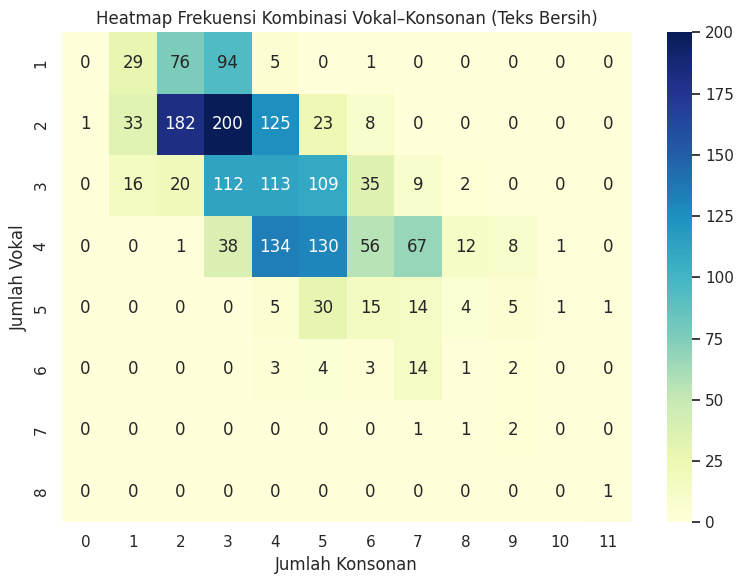

In [11]:
#Heatmap Frekuensi Kombinasi Vokal–Konsonan Berdasarkan Teks Bersih
plt.figure(figsize=(8,6))
sns.heatmap(pivot_freq, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Heatmap Frekuensi Kombinasi Vokal–Konsonan (Teks Bersih)")
plt.xlabel("Jumlah Konsonan")
plt.ylabel("Jumlah Vokal")
plt.tight_layout()
plt.show()

Heatmap frekuensi ini secara visual menyoroti pola penggunaan kata dalam artikel. Titik paling terang (hotspot) pada area berwarna kuning dengan jelas menunjukkan bahwa struktur kata yang paling sering muncul adalah kombinasi 2 vokal dan 3 konsonan, yang digunakan sebanyak 200 kali. Kesimpulan ini dapat ditarik secara instan karena heatmap berhasil mengubah data numerik menjadi sebuah cerita visual, di mana warna terang secara otomatis menandakan frekuensi penggunaan tertinggi.

Dalam perhitungan ini, dominasi frekuensi didorong oleh tingginya tingkat pengulangan (repetisi) dari sejumlah kata umum yang memiliki struktur tersebut.

##Distribusi Panjang Kata

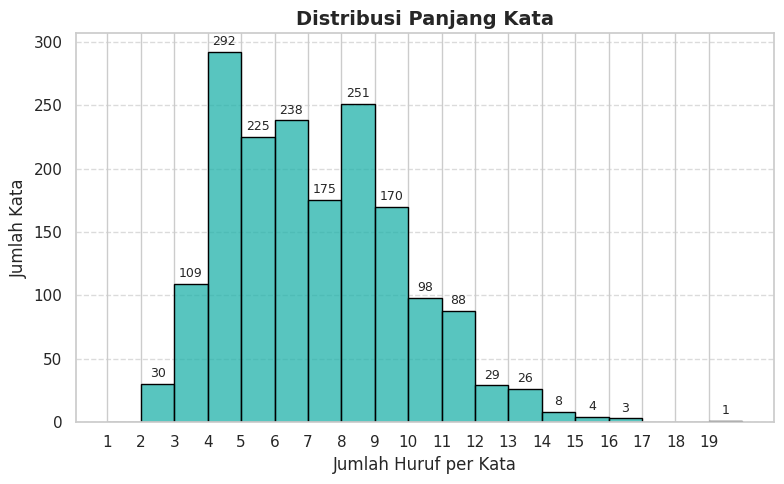

In [12]:
#Histogram Distribusi Panjang Kata Berdasarkan Teks Bersih
panjang_kata = [len(k) for k in teks_bersih.split()]

df_panjang = pd.DataFrame({
    "Kata": teks_bersih.split(),
    "Panjang Kata": panjang_kata
})

plt.figure(figsize=(8,5))
ax = sns.histplot(
    data=df_panjang,
    x="Panjang Kata",
    bins=range(1, max(panjang_kata)+2),
    color="#20B2AA",
    edgecolor="black"
)

plt.title("Distribusi Panjang Kata", fontsize=14, weight="bold")
plt.xlabel("Jumlah Huruf per Kata", fontsize=12)
plt.ylabel("Jumlah Kata", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, max(panjang_kata)+1))

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width()/2,
            height + 3,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()


Histogram di atas menunjukkan distribusi panjang kata yang condong ke kanan (right-skewed), yang berarti mayoritas kata dalam teks adalah kata-kata pendek hingga sedang. Puncak frekuensi tertinggi terlihat pada kata-kata dengan 4 huruf, yaitu terdapat 292 kata. Bentuk distribusi yang condong ini disebabkan oleh adanya sejumlah kata yang jauh lebih panjang, termasuk sebuah outlier atau pencilan, yaitu satu kata dengan panjang ekstrem 19 huruf(kata mengidentifikasikan)

##Cacah kata yang masuk dalam tiap kombinasi konsonan-vokal

In [13]:
#Tabel Pivot Cacah Kata Unik Kombinasi Vokal–Konsonan Berdasarkan Teks Bersih
pivot_unique = (
    df_kata.drop_duplicates(subset='Kata')
    .groupby(['Jumlah Vokal', 'Jumlah Konsonan'])
    .size()
    .unstack(fill_value=0)
)

print("\n=== Tabel Pivot 2: Cacah Kata Unik Kombinasi Vokal–Konsonan ===")
display(pivot_unique)


=== Tabel Pivot 2: Cacah Kata Unik Kombinasi Vokal–Konsonan ===


Jumlah Konsonan,0,1,2,3,4,5,6,7,8,9,10,11
Jumlah Vokal,,,,,,,,,,,,
1,0,4,3,3,1,0,1,0,0,0,0,0
2,1,5,32,52,32,8,5,0,0,0,0,0
3,0,2,8,38,49,50,20,6,1,0,0,0
4,0,0,1,15,39,58,36,20,8,5,1,0
5,0,0,0,0,3,6,8,10,3,3,1,1
6,0,0,0,0,2,1,3,3,1,2,0,0
7,0,0,0,0,0,0,0,1,1,1,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1


Tabel pivot ini tidak lagi menghitung frekuensi total kemunculan setiap kombinasi vokal-konsonan seperti analisis sebelumnya. Sebaliknya, tabel ini menyajikan cacah kata unik atau keragaman kosakata untuk setiap struktur kata.
Hal ini karena dalam proses analisisnya, setiap kata yang muncul berulang kali (duplikat) telah disaring dan hanya dihitung satu kali saja.

Contohnya angka 4 pada kombinasi 1 vokal dan 1 konsonan itu mengartikan bahwa ada 4 kata yang berbeda yang memiliki struktur tersebut.


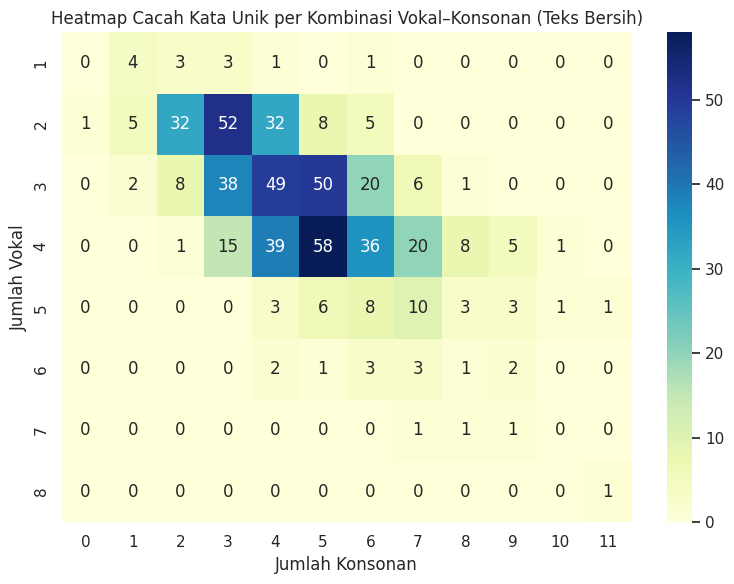

In [14]:
#Heatmap Cacah Kata Unik Kombinasi Vokal–Konsonan Berdasarkan Teks Bersih
plt.figure(figsize=(8,6))
sns.heatmap(pivot_unique, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Heatmap Cacah Kata Unik per Kombinasi Vokal–Konsonan (Teks Bersih)")
plt.xlabel("Jumlah Konsonan")
plt.ylabel("Jumlah Vokal")
plt.tight_layout()
plt.show()

Heatmap di atas merupakan visualisasi dari cacah atau jumlah kata unik untuk setiap kombinasi vokal-konsonan. Berbeda dengan analisis frekuensi, heatmap ini menunjukkan bahwa puncak keragaman kosakata tidak terletak pada kata-kata yang pendek.

Didapatkan hasil bahwa area paling terang (hotspot) yang menunjukkan keragaman kosakata tertinggi ternyata berada pada kombinasi 4 vokal dan 5 konsonan, dengan 58 kata unik. Titik-titik tinggi lainnya yang juga signifikan terdapat pada kombinasi 2 vokal dan 3 konsonan (52 kata unik) dan 3 vokal dan 5 konsonan (50 kata unik).

Hal ini memperkuat indikasi bahwa meskipun teks didominasi oleh penggunaan kata-kata pendek yang berulang, kekayaan dan variasi kosakata tertinggi justru ditemukan pada kata-kata berdurasi sedang hingga panjang yang kemungkinan besar digunakan untuk menjelaskan konsep-konsep yang lebih spesifik.

##Jumlah kata dalam kalimat

In [15]:
kalimat_list = re.split(r'[.!?]', teks_asli)
kalimat_list = [kal.strip() for kal in kalimat_list if kal.strip()]

data_kalimat = [
    {"Kalimat": kal, "Jumlah Kata": len(kal.split())}
    for kal in kalimat_list
]
df_kalimat = pd.DataFrame(data_kalimat)

In [16]:
#Tabel Analisis Jumlah Kata dalam Tiap Kalimat Berdasarkan Teks Asli
print("=== Jumlah Kata dalam Tiap Kalimat (Teks Asli) ===")
display(df_kalimat)

=== Jumlah Kata dalam Tiap Kalimat (Teks Asli) ===


,Kalimat,Jumlah Kata
0,﻿Emerging adulthood adalah fase di mana indivi...,23
1,Tantangan yang dihadapi meliputi tuntutan hidu...,23
2,Hal tersebut berpengaruh terhadap perubahan pe...,14
3,Tujuan penelitian ini adalah untuk melihat leb...,17
4,Partisipan penelitian adalah dua orang perempu...,15
...,...,...
73,"Akibatnya, perilaku dan interaksi yang dilakuk...",21
74,"Selain itu, peneliti juga belum secara mendala...",31
75,Saran untuk partisipan adalah berlatih untuk m...,16
76,Adapun untuk individu yang berada di fase emer...,25


Tabel di atas memecahkan artikel asli menjadi 78 kalimat dan menampilkannya satu per satu. Setiap barisnya menunjukkan isi kalimat beserta jumlah katanya yang presisi, sehingga variasi panjangnya jadi sangat jelas terlihat. Contohnya, kalimat pertama punya 23 kata, sementara kalimat kelima hanya 15 kata. Intinya, tabel ini bisa menjadi rujukan detail untuk melihat struktur panjang-pendeknya tulisan dari kalimat ke kalimat.

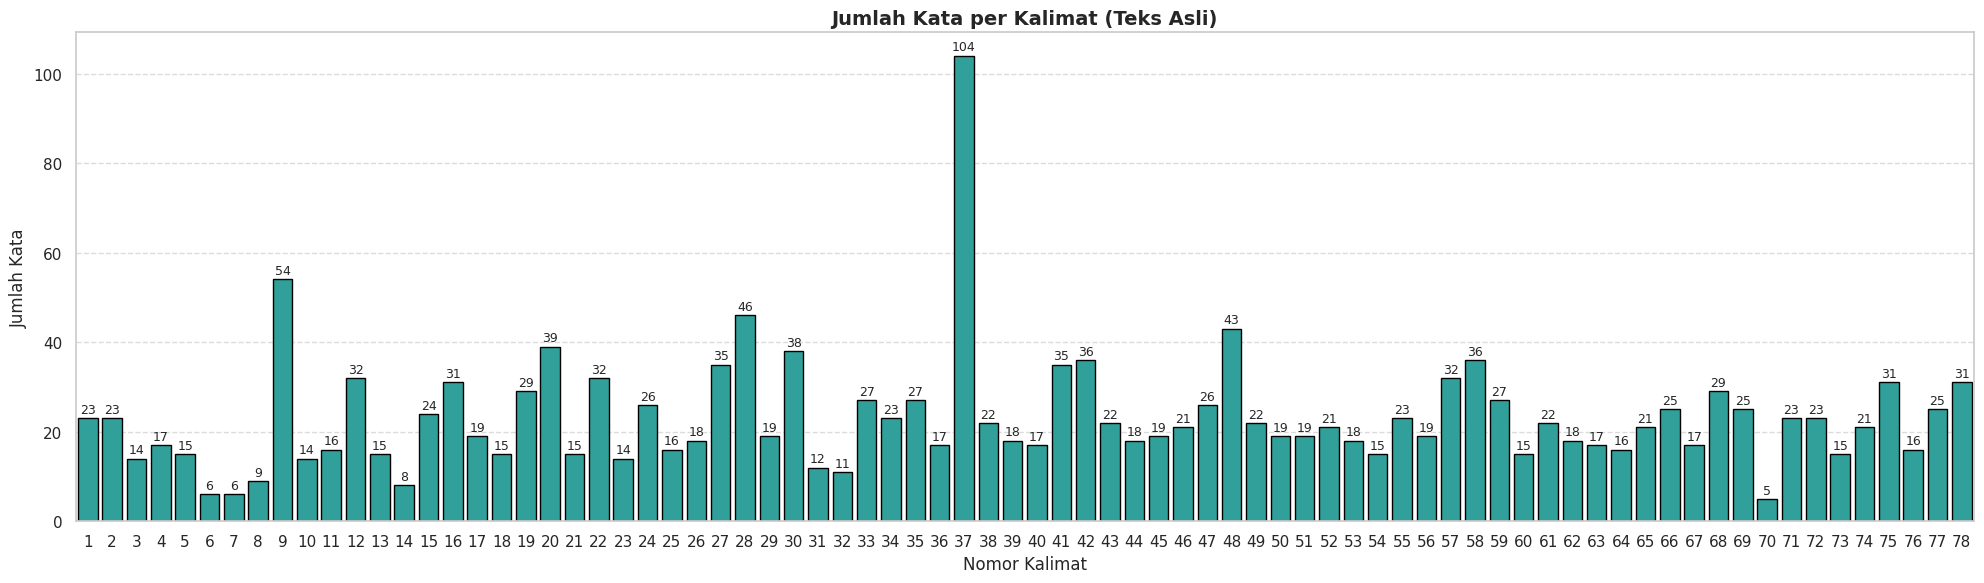

In [17]:
#Bar Chart Jumlah Kata per Kalimat Berdasarkan Teks Asli
plt.figure(figsize=(20,6))
ax = sns.barplot(
    data=df_kalimat.reset_index().rename(columns={"index": "No"}),
    x=df_kalimat.index + 1,
    y="Jumlah Kata",
    color="#20B2AA",
    edgecolor="black"
)

plt.title("Jumlah Kata per Kalimat (Teks Asli)", fontsize=14, weight="bold")
plt.xlabel("Nomor Kalimat", fontsize=12)
plt.ylabel("Jumlah Kata", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2,
            height + 0.5,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()


Grafik batang ini menyajikan visualisasi data mengenai jumlah kata untuk setiap kalimat dalam artikel yang dianalisis. Dari total 78 kalimat, dapat diamati bahwa panjang kalimat menunjukkan variasi yang signifikan.

Dalam grafik tersebut bisa terlihat jelas adanya sebuah pencilan (outlier), yaitu kalimat nomor 37 yang memiliki panjang ekstrem 104 kata. Kalimat dengan panjang signifikan ini diinterpretasikan sebagai sebuah pemaparan definisi atau konsep yang padat dan terstruktur, seperti penjelasan kelima aspek model PERMA, yang sengaja dirangkai menjadi satu kesatuan kalimat untuk menjaga keutuhan konteksnya.

##Distribusi Jumlah Kata per Kalimat

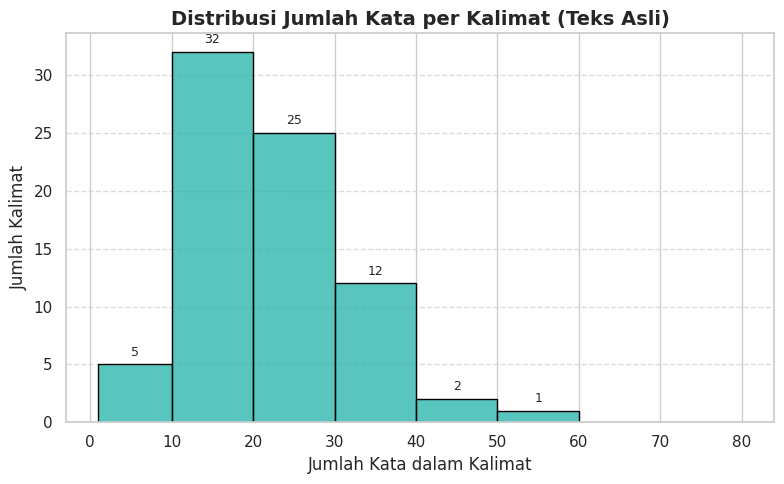

In [18]:
#Histogram Distribusi Jumlah Kata per Kalimat Berdasarkan Teks Asli
plt.figure(figsize=(8,5))
bin_edges = [1, 10, 20, 30, 40, 50, 60, 70, 80]

ax = sns.histplot(
    data=df_kalimat,
    x="Jumlah Kata",
    bins=bin_edges,
    color="#20B2AA",
    edgecolor="black"
)

plt.title("Distribusi Jumlah Kata per Kalimat (Teks Asli)", fontsize=14, weight="bold")
plt.xlabel("Jumlah Kata dalam Kalimat", fontsize=12)
plt.ylabel("Jumlah Kalimat", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width()/2,
            height + 0.5,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

plt.show()


Grafik histogram ini merepresentasikan distribusi frekuensi jumlah kata per kalimat dari teks asli yang dianalisis, yang menunjukkan bahwa mayoritas kalimat tergolong pendek hingga sedang. Modus distribusi terletak pada rentang 10-20 kata, di mana terdapat 32 kalimat yang masuk dalam kategori ini, menjadikannya kelompok panjang kalimat yang paling dominan. Bentuk distribusi ini secara keseluruhan condong ke kanan (right-skewed), yang mengonfirmasi adanya beberapa kalimat yang sangat panjang sebagai pencilan (outlier) yang membentang di sisi kanan grafik.

##Jumlah kalimat dalam paragraf

In [19]:
#Membagi teks asli menjadi paragraf-paragraf dan menghitung jumlah kalimat dalam setiap paragraf
paragraf_list = re.split(r'\n\s*\n', teks_asli.strip())

data_paragraf = []
for i, p in enumerate(paragraf_list, start=1):
    kalimat = re.split(r'[.!?]+', p)
    kalimat = [k.strip() for k in kalimat if k.strip() != ""]
    jumlah_kalimat = len(kalimat)
    if jumlah_kalimat == 0:
        jumlah_kalimat = 1

    isi_ringkas = textwrap.shorten(p, width=100, placeholder="...")
    data_paragraf.append([f"Paragraf {i}", isi_ringkas, jumlah_kalimat])

df_paragraf = pd.DataFrame(data_paragraf, columns=["Judul", "Isi Ringkas", "Jumlah Kalimat"])

In [20]:
#Menganalisis Jumlah Kalimat dalam Tiap Paragraf dan Menampilkannya dalam Tabel
print("=== Jumlah Kalimat dalam Tiap Paragraf (Teks Asli) ===")
display(df_paragraf)

=== Jumlah Kalimat dalam Tiap Paragraf (Teks Asli) ===


,Judul,Isi Ringkas,Jumlah Kalimat
0,Paragraf 1,﻿Emerging adulthood adalah fase di mana indivi...,10
1,Paragraf 2,Emerging adulthood merupakan salah satu bentuk...,3
2,Paragraf 3,Reaksi individu terhadap tuntutan yang dirasak...,3
3,Paragraf 4,Atwood dan Scholtz (2008) memperkenalkan kondi...,5
4,Paragraf 5,Penelitian Habibie et al (2019) mengungkapkan ...,6
5,Paragraf 6,"Menurut Zwagery dan Yuniarrahmah (2021), cara ...",3
6,Paragraf 7,Flourishing merupakan konsep yang dikembangkan...,5
7,Paragraf 8,Flourishing tidak dapat muncul atau dimiliki s...,2
8,Paragraf 9,Individu dianggap sejahtera atau flourishing j...,5
9,Paragraf 10,"Dalam kehidupan sehari-hari, individu yang men...",4


Hasil analisis terhadap bagian abstrak, pendahuluan, dan kesimpulan artikel menunjukkan bahwa cuplikan yang diambil ini terdiri dari total 18 paragraf. Tabel ini bukan sebagai alat untuk menemukan pola umum, fungsi utamanya adalah untuk validasi. Dengan demikian, tabel ini berperan sebagai lampiran data yang mendukung analisis selanjutnya.

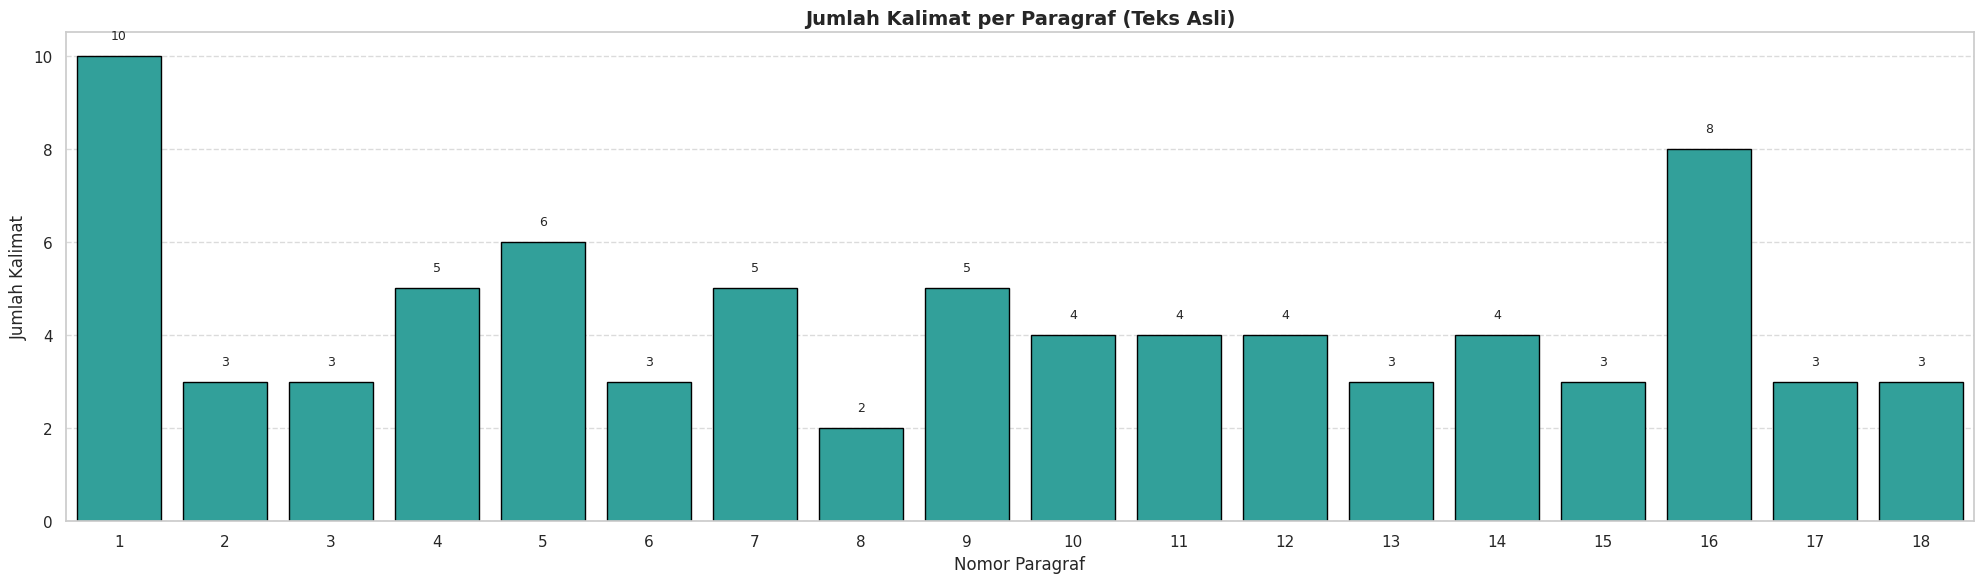

In [21]:
# Bar Chart Jumlah Kalimat per Paragraf (Teks Asli)
plt.figure(figsize=(20,6))
ax = sns.barplot(
    data=df_paragraf.reset_index().rename(columns={"index": "No"}),
    x=range(1, len(df_paragraf) + 1),  # mulai dari 1
    y="Jumlah Kalimat",
    color="#20B2AA",
    edgecolor="black"
)

plt.title("Jumlah Kalimat per Paragraf (Teks Asli)", fontsize=14, weight="bold")
plt.xlabel("Nomor Paragraf", fontsize=12)
plt.ylabel("Jumlah Kalimat", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2,
            height + 0.3,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()

Bar chart ini disusun untuk menerka strategi penulisan dalam artikel dengan memvisualisasikan distribusi kalimat per paragraf. Grafik ini menunjukkan pola dominan berupa paragraf ringkas yang terdiri dari 3-4 kalimat, yang digunakan untuk menyajikan argumen secara terfokus. Namun, ada dua pengecualian yang menonjol. Paragraf 1, dengan 10 kalimat, yang mana merupakan abstrak dari artikel ini berfungsi menejabarkan secara lengkap tentang isi artikel, sementara Paragraf 16 dengan 8 kalimat menjadi inti dari bagian kesimpulan. Hal ini menunjukkan bahwa bagian-bagian penting sengaja disampaikan dalam paragraf yang lebih padat, sedangkan sisanya dipecah menjadi unit-unit yang dapat lebih mudah diikuti oleh pembaca.

## Distribusi Jumlah Kalimat dalam Paragraf

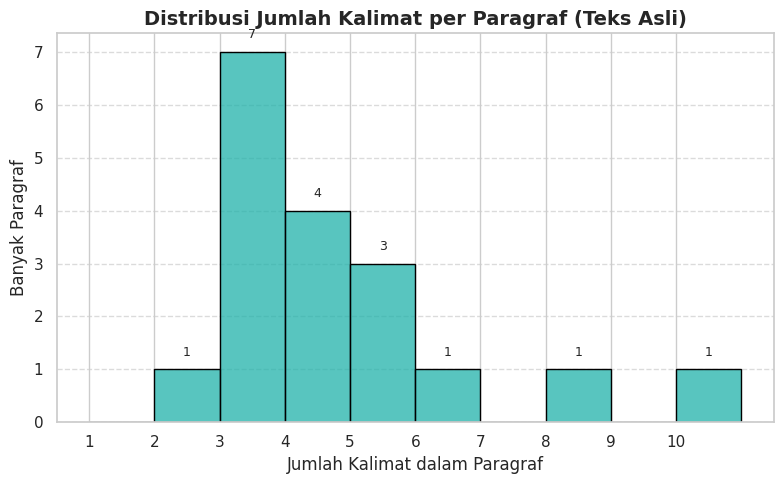

In [22]:
#Histogram Distribusi Jumlah Kalimat per Paragraf (Teks Asli)
plt.figure(figsize=(8,5))
ax = sns.histplot(
    data=df_paragraf,
    x="Jumlah Kalimat",
    bins=range(1, df_paragraf["Jumlah Kalimat"].max()+2),
    color="#20B2AA",
    edgecolor="black"
)

plt.title("Distribusi Jumlah Kalimat per Paragraf (Teks Asli)", fontsize=14, weight="bold")
plt.xlabel("Jumlah Kalimat dalam Paragraf", fontsize=12)
plt.ylabel("Banyak Paragraf", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(1, df_paragraf["Jumlah Kalimat"].max()+1))

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width()/2,
            height + 0.2,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

plt.tight_layout()
plt.show()

Histogram di atas merangkum struktur keseluruhan artikel, dengan bentuk distribusinya condong ke kanan. Puncak tertinggi grafik, dengan 7 paragraf yang memiliki panjang 3 kalimat, menunjukkan bahwa cuplikan artikel ini mayoritas tersusun atas paragraf ringkas. Secara keseluruhan, grafik ini menyimpulkan bahwa strategi penulisan artikel adalah membangun argumen di atas fondasi paragraf-paragraf pendek, dengan beberapa pengecualian yang lebih padat untuk bagian-bagian penting.

#Eksplorasi Mandiri

Saya melakukan analisis tambahan karena penasaran, ingin mencoba beralih dari aspek 'bagaimana' artikel ditulis ke aspek 'apa' yang dibahas dalam artikel. Dari situ saya melakukan analisis Top Words dengan menghitung frekuensi kata yang paling sering muncul setelah terlebih dahulu menghilangkan stopwords (kata umum tanpa makna signifikan). Hasil dari perhitungan frekuensi ini kemudian divisualisasikan dalam Bar Chart dan Word Cloud untuk menyajikan rangkuman tematik dari artikel secara visual dan intuitif.

In [28]:
#Menghitung 20 kata yang paling sering muncul setelah stopwords dihapus
tokens_bersih = teks_tanpa_stopwords.split()
word_counts = Counter(tokens_bersih).most_common(20)
df_top = pd.DataFrame(word_counts, columns=["Kata", "Frekuensi"])

/tmp/ipython-input-1330902325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="Frekuensi", y="Kata", palette="Blues_r")


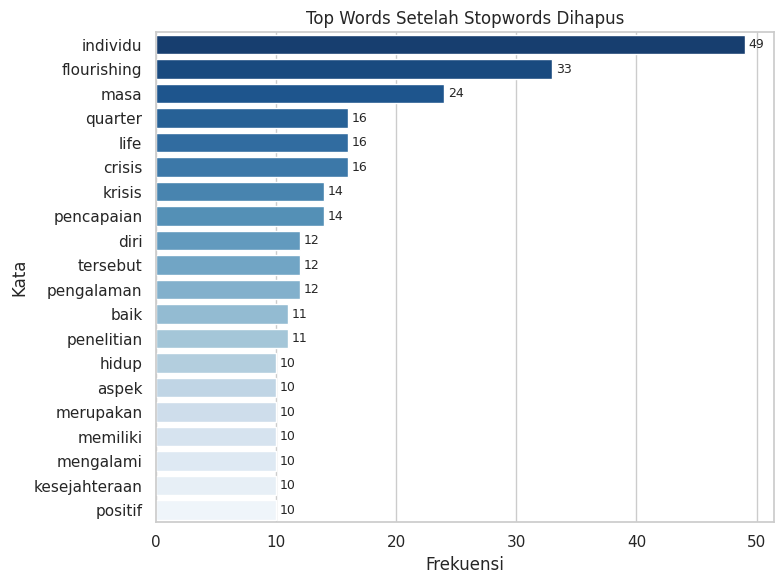

In [29]:
#Bar Chart 20 Kata yang Paling Sering Muncul
plt.figure(figsize=(8,6))
sns.barplot(data=df_top, x="Frekuensi", y="Kata", palette="Blues_r")
for i, v in enumerate(df_top["Frekuensi"]):
    plt.text(v + 0.3, i, str(v), va='center', fontsize=9)
plt.title("Top Words Setelah Stopwords Dihapus")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.tight_layout()
plt.show()

Grafik batang di atas menampilkan 20 kata dengan frekuensi tertinggi setelah stopwords dihilangkan. Hasilnya dengan sangat jelas merangkum esensi tematik dari artikel tersebut. Kata-kata seperti "individu" (49 kali), "flourishing" (33 kali), "masa" (24 kali), serta kelompok kata "quarter", "life", dan "crisis" (muncul dalam versi Bahasa Inggris dan Indonesia, "krisis") menjadi yang paling dominan. Kemunculan kata-kata kunci ini secara bersamaan menegaskan bahwa fokus utama tulisan adalah seputar pengalaman individu dalam menghadapi quarter-life crisis dan proses untuk mencapai kondisi flourishing.

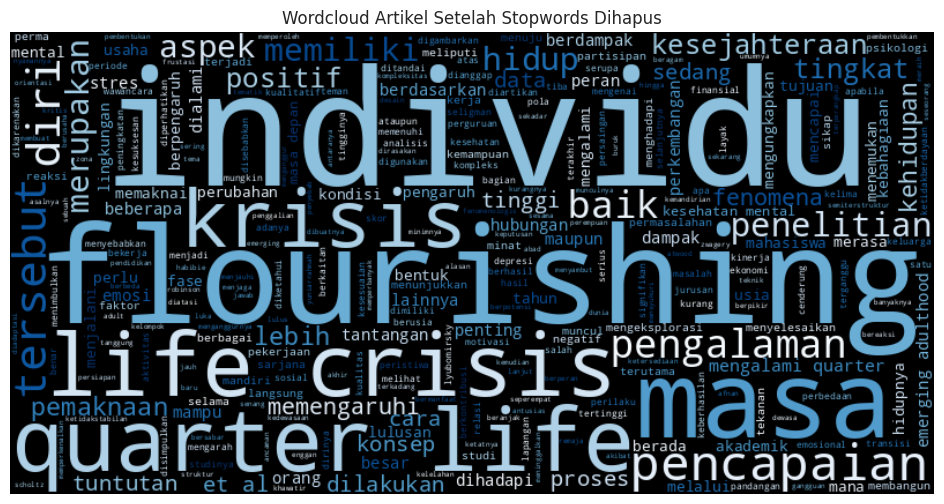

In [31]:
#Wordcloud Setelah Stopwords Dihapus
teks_join = " ".join(tokens_bersih)
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="black",
    colormap="Blues",
    max_words=300
).generate(teks_join)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Artikel Setelah Stopwords Dihapus")
plt.show()

Word cloud ini berfungsi sebagai rangkuman visual dari analisis frekuensi kata kunci, di mana ukuran setiap kata merepresentasikan tingkat kepentingannya dalam teks. Secara instan, kata-kata yang paling menonjol seperti "individu", "flourishing", "quarter", "life", dan "crisis" langsung menarik perhatian. Kombinasi kata-kata ini secara visual menegaskan bahwa inti pembahasan artikel adalah pengalaman individu dalam menghadapi quarter-life crisis untuk mencapai kondisi flourishing.

Selain itu, kata-kata pendukung seperti "masa", "pengalaman", "pencapaian", dan "diri" juga tampil dengan ukuran yang signifikan, memperkuat gambaran bahwa penelitian memang berfokus pada pengalaman personal seseorang. Kemunculan berbagai istilah ini semakin melengkapi pemahaman mengenai topik yang dibahas. Pada akhirnya, visualisasi ini berhasil merangkum topik penelitian secara padat dan intuitif, sekaligus memberikan konfirmasi cepat mengenai inti dari artikel.

#Kesimpulan

Analisis komputasional terhadap cuplikan artikel ini berhasil mengungkap dua hal utama: struktur penulisan yang teratur dan pokok bahasan yang sangat fokus.

Dari sisi struktur, tulisan ini menunjukkan ciri khas karya akademis yang disiplin. Penulis membangun argumennya menggunakan paragraf-paragraf ringkas, yang umumnya terdiri dari 3-4 kalimat dengan panjang rata-rata 10-19 kata. Pola yang teratur ini sengaja tidak diterapkan pada bagian-bagian penting, seperti penggunaan satu kalimat ekstrem sepanjang 104 kata dan paragraf pembuka berisi 10 kalimat untuk memaparkan konsep dasar secara utuh.

Struktur yang terkontrol tersebut menjadi wadah yang efektif untuk tema utamanya. Setelah kata-kata umum disaring, analisis konten secara akurat menunjuk pada topik inti. Kemunculan dominan dari kata kunci seperti "individu", "flourishing", "crisis", "quarter", dan "life" tidak menyisakan keraguan bahwa artikel ini membahas pengalaman personal dalam menghadapi quarter-life crisis dan upaya mencapai kondisi flourishing.

Pada akhirnya, dapat disimpulkan bahwa melalui analisis kode ini, terbukti bahwa struktur tulisan yang teratur dan bervariasi tersebut secara efektif digunakan untuk menyampaikan sebuah tema yang sangat spesifik mengenai tantangan dan perkembangan personal di masa dewasa awal.